# 평가

### 분류 모델 평가

### 정확도 (Accuracy)
- 전체 샘플 중에서 올바르게 예측한 샘플의 비율
- 데이터가 불균형한 경우 정확도는 비현실적인 성능을 낼 수 있음

In [4]:
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

# 성별로만 판별하는 모델 작성
class MyTitanicClassifier(BaseEstimator):
    def fit(self, X, y):
        # 훈련 메서드
        pass
    def predict(self, X):
        # 결과 예측 메서드
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            sex = X['Sex'].iloc[i]
            if sex == 0:        # 여성
                pred[i] = 1     # 생존
        return pred

In [5]:
# 전처리 -> 함수
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def fillna(df: pd.DataFrame):
    """결측치 처리 함수
    - Age : 평균값으로 대체
    - Cabin : N으로 대체
    - Embarked : N으로 대체
    """
    df['Age'] = df['Age'].fillna(df.Age.mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df

def drop_features(df: pd.DataFrame):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


def encode_features(df: pd.DataFrame):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    # encoder = LabelEncoder()
    # df['Sex'] = encoder.fit_transform(df['Sex'])    
    # df['Cabin'] = encoder.fit_transform(df['Cabin'])
    # df['Embarked'] = encoder.fit_transform(df['Embarked'])
    df['Cabin'] = df['Cabin'].str[:1]
    for c in ['Sex', 'Cabin', 'Embarked']:
        encoder = LabelEncoder()
        df[c] = encoder.fit_transform(df[c])
    return df
    

def scaling_features(train_data: pd.DataFrame, test_data: pd.DataFrame):
    """
    숫자 데이터를 정규화
    - Age, Fare
    """
    scaler = StandardScaler()
    train_data[["Age", "Fare"]] = scaler.fit_transform(train_data[["Age", "Fare"]])
    test_data[["Age", "Fare"]] = scaler.transform(test_data[["Age", "Fare"]])
    return train_data, test_data

# 입력/라벨 데이터 분리
def preprocess_data(df: pd.DataFrame):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop(['Survived'], axis=1)
y = df['Survived']


# 전처리
X = preprocess_data(X)


# 훈련 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test = scaling_features(X_train, X_test)

In [7]:
from sklearn.metrics import accuracy_score

# 모델 훈련
my_classifier = MyTitanicClassifier()
my_classifier.fit(X_train, y_train)

# 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

# 평가 (accuracy_score 사용)
print('훈련 데이터 정확도:', accuracy_score(y_train, pred_train))
print('훈련 데이터 정확도:', accuracy_score(y_test, pred_test))

훈련 데이터 정확도: 0.7889221556886228
훈련 데이터 정확도: 0.7802690582959642


##### 혼동행렬 (Confusion Matrix)

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [44]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=digits.target_names, ytichlabels=digits.targets_names)
plt.xlabel('1')
plt.ylabel('2')
plt.show()

AttributeError: targets_names

- 정밀도 (Precision)
    - 양성이라고 예측한 것(TP + FP) 중에 실제 양성 (TP)일 확률
    - 정밀도가 중요한 지표인경우
        - 음성인 데이터를 양성으로 예측하면 안되는 경우 (스팸메일 분류 등)

In [9]:
matrix = confusion_matrix(y_test, pred_test)
matrix

array([[115,  24],
       [ 25,  59]])

In [10]:
p_score = 115 / (115 + 24)
precision_score(y_test, pred_test)

0.7108433734939759

- 재현율
    - 실제 양성(TP+FN)중에 양성으로 예측(TP)한 확률
    - 재현율이 중요한 지표인 경우: 양성인 데이터를 음성으로 예측하면 안되는 경우
    - (암 진단, 보험/금융 사기)

In [11]:
recall_score(y_test, pred_test)

0.7023809523809523

In [29]:
# 잘못 학습된 모델 만들어보기 2
class MyDeathClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((X.shape[0], 1))    # 전부 사망
    
my_classifier = MyDeathClassifier()
my_classifier.fit(X_train, y_train)

pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

print('훈련 데이터 혼동행렬:\n', confusion_matrix(y_train, pred_train))
print('훈련 데이터 정확도:\n', accuracy_score(y_train, pred_train))
print('훈련 데이터 정밀도:\n', precision_score(y_train, pred_train))
print('훈련 데이터 재현율:\n', recall_score(y_train, pred_train))

print('훈련 데이터 혼동행렬:\n', confusion_matrix(y_test, pred_test))
print('훈련 데이터 정확도:\n', accuracy_score(y_test, pred_test))
print('훈련 데이터 정밀도:\n', precision_score(y_test, pred_test))
print('훈련 데이터 재현율:\n', recall_score(y_test, pred_test))

훈련 데이터 혼동행렬:
 [[410   0]
 [258   0]]
훈련 데이터 정확도:
 0.6137724550898204
훈련 데이터 정밀도:
 0.0
훈련 데이터 재현율:
 0.0
훈련 데이터 혼동행렬:
 [[139   0]
 [ 84   0]]
훈련 데이터 정확도:
 0.6233183856502242
훈련 데이터 정밀도:
 0.0
훈련 데이터 재현율:
 0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# 오차행렬 
def evalute_binary_classification(y_true, y_pred):
    print("혼돈행렬:\n", confusion_matrix(y_true, y_pred))
    print(f'정확도: {accuracy_score(y_true, y_pred)},정밀도: {precision_score(y_true, y_pred)},재현율: {recall_score(y_true, y_pred)}')

In [14]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('./data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# 전처리
X = preprocess_data(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 훈련
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 예측 및 평가
pred_train = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)
evalute_binary_classification(y_train, pred_train)
evalute_binary_classification(y_test, pred_test)

혼돈행렬:
 [[350  60]
 [ 77 181]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.7949101796407185,정밀도: 0.7510373443983402,재현율: 0.7015503875968992
혼돈행렬:
 [[116  23]
 [ 23  61]]
정확도: 0.7937219730941704,정밀도: 0.7261904761904762,재현율: 0.7261904761904762


- 정밀도-재현율의 trade-off
    - 분류 결정 임계치를 낮추면? Positive로 예측할 확률이 늘어난다
        - 정밀도는 낮아지고, 재현율이 높아진다.
    - 분류 결정 임계치를 높히면? Positive로 예측할 확률이 줄어든다
        - 정밀도는 높아지고, 재현율이 낮아진다.

In [15]:
pred_proba = lr_clf.predict_proba(X_test) 
print(pred_proba[:7])

pred = lr_clf.predict(X_test)
print(pred[:7])

[[0.83844267 0.16155733]
 [0.88898638 0.11101362]
 [0.92128685 0.07871315]
 [0.05549119 0.94450881]
 [0.29742219 0.70257781]
 [0.50424527 0.49575473]
 [0.09128656 0.90871344]]
[0 0 0 1 1 0 1]


In [16]:
from sklearn.preprocessing import Binarizer

temp_X = [[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]
binarizer = Binarizer(threshold=0.09)
adj_X = binarizer.fit_transform(temp_X)
adj_X

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [17]:
from sklearn.preprocessing import Binarizer

# 1(생존)일 확률만 가져오고 + 배치 차원 추가
predict_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=0.5)
custom_pred = binarizer.fit_transform(predict_proba_1)
evalute_binary_classification(y_test, custom_pred)

binarizer = Binarizer(threshold=0.6)
custom_pred = binarizer.fit_transform(predict_proba_1)
evalute_binary_classification(y_test, custom_pred)

혼돈행렬:
 [[116  23]
 [ 23  61]]
정확도: 0.7937219730941704,정밀도: 0.7261904761904762,재현율: 0.7261904761904762
혼돈행렬:
 [[124  15]
 [ 29  55]]
정확도: 0.8026905829596412,정밀도: 0.7857142857142857,재현율: 0.6547619047619048


In [18]:
# 임계치 별 평과 결과 확인
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

def evalute_by_classification(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custom_pred = binarizer.fit_transform(y_pred)
        evalute_binary_classification(y_true, custom_pred)

evalute_by_classification(y_test, predict_proba_1, thresholds)

혼돈행렬:
 [[109  30]
 [ 19  65]]
정확도: 0.7802690582959642,정밀도: 0.6842105263157895,재현율: 0.7738095238095238
혼돈행렬:
 [[114  25]
 [ 19  65]]
정확도: 0.8026905829596412,정밀도: 0.7222222222222222,재현율: 0.7738095238095238
혼돈행렬:
 [[116  23]
 [ 23  61]]
정확도: 0.7937219730941704,정밀도: 0.7261904761904762,재현율: 0.7261904761904762
혼돈행렬:
 [[121  18]
 [ 23  61]]
정확도: 0.8161434977578476,정밀도: 0.7721518987341772,재현율: 0.7261904761904762
혼돈행렬:
 [[124  15]
 [ 29  55]]
정확도: 0.8026905829596412,정밀도: 0.7857142857142857,재현율: 0.6547619047619048
혼돈행렬:
 [[130   9]
 [ 36  48]]
정확도: 0.7982062780269058,정밀도: 0.8421052631578947,재현율: 0.5714285714285714
혼돈행렬:
 [[134   5]
 [ 39  45]]
정확도: 0.8026905829596412,정밀도: 0.9,재현율: 0.5357142857142857


In [19]:
# 정밀도-재현율 변화 과정 시각화
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# thresholds에 따른 precision, recall 값 반환
precisions, recalls, thresholds = precision_recall_curve(y_test, predict_proba_1)

# 기준 thresholds 211개
# - 모든 샘플이 양성 클래스인 경우에 대한 계산치가 추가되어
# - 정밀도는 마지막에 1 추가 (임계값이 매우 낮아 모든 샘플이 양성으로 예측된 경우)
# - 재한율은 마지막에 0 추가 (임계값이 매우 높아 모든 샘플이 음성으로 예측된 경우)
# precisions.shape, recalls.shape, thresholds.shape

plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision_score[:-1], linestyle='--', label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Thresholds')
plt.ylabel('Precision and Recall values')
plt.legend()
plt.show()

TypeError: 'function' object is not subscriptable

<Figure size 600x400 with 0 Axes>

- F1-score
    - 정밀도와 재현율을 결합한 지표

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_test)
# 오차행렬 
def evalute_by_classification(y_true, y_pred):
    print("혼돈행렬:\n", confusion_matrix(y_true, y_pred))
    print(f'정확도: {accuracy_score(y_true, y_pred)},정밀도: {precision_score(y_true, y_pred)},재현율: {recall_score(y_true, y_pred)}, f1: {f1_score(y_true, y_pred)}')

### ROC Curve - AUC

##### ROC Curve - AUC
- ROC Curve (Receiver Operation Characteristic Curve, 수신자 조작 특성 커브)
    - x축: FPR (False Positive Rate), 실제 음성을 잘못 예측한 비율
        - FPR = FP / (FP + TN)
    - y축: TPR (True Positive Rate), recall score
        - TPR = TP / (FN + TP)
- AUC (Area Under Curve): ROC 곡선 아래 면적 (1에 가까울수록 성능 좋음)

In [32]:
from sklearn.metrics import roc_curve

y_true_sample = np.array([0, 0, 1, 1])
y_pred_smaple = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_sample, y_pred_smaple)
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


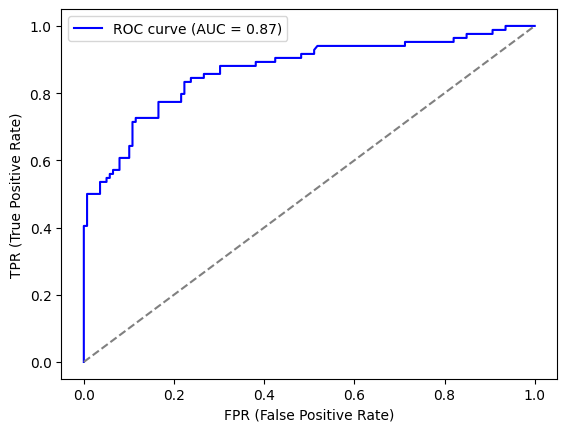

In [42]:
from sklearn.metrics import auc

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()


### 회귀 모델 평가

In [46]:
# 샘플 데이터
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0, 2, 9]

In [47]:
from sklearn.metrics import mean_squared_error          # MSE (퍙균 제곱 오차)
from sklearn.metrics import root_mean_squared_error     # RMSE (평균 제곱 오차 제곱근)
from sklearn.metrics import mean_absolute_error         # MAE (평균 절대값 오차)
from sklearn.metrics import mean_squared_log_error      # MSLE (평균 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error # RMSLE (평균 제곱 로그 오차 제곱근)
from sklearn.metrics import r2_score                    # R^2 결정 계수

print(mean_squared_error(y_test, pred_test))
print(root_mean_squared_error(y_test, pred_test))
print(mean_absolute_error(y_test, pred_test))
print(mean_squared_log_error(y_test, pred_test))
print(root_mean_squared_log_error(y_test, pred_test))
print(r2_score(y_test, pred_test))

ValueError: Found input variables with inconsistent numbers of samples: [360, 223]